Coupon Redemption for Credit Card Campaign
==============

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Exploratory Data Analysis
## Load Data

In [2]:
data_path = '../data/Predicting Coupon Redemption/train'
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
demo_df = pd.read_csv(os.path.join(data_path, 'customer_demographics.csv'))
cmpn_df = pd.read_csv(os.path.join(data_path, 'campaign_data.csv'))
cp_it_df = pd.read_csv(os.path.join(data_path, 'coupon_item_mapping.csv'))
txn_df = pd.read_csv(os.path.join(data_path, 'customer_transaction_data.csv'))
item_df = pd.read_csv(os.path.join(data_path, 'item_data.csv'))

## Exploratory Data Analysis
### Train data

In [3]:
colors = sns.color_palette("deep")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [5]:
print("there are {} unique customers".format(train_df['customer_id'].nunique()))
print("there are {} unique campaigns".format(train_df['campaign_id'].nunique()))
print("there are {} unique coupons".format(train_df['coupon_id'].nunique()))

there are 1428 unique customers
there are 18 unique campaigns
there are 866 unique coupons


### Demographics

In [6]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [7]:
join_demo_df = train_df.merge(demo_df, on='customer_id', how='left')
join_demo_df.shape

(78369, 11)

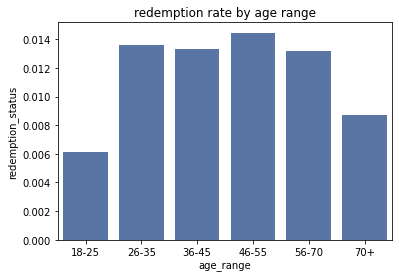

In [8]:
join_demo_df.groupby('age_range').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='age_range', y='redemption_status', color=colors[0])
plt.title('redemption rate by age range')
plt.show()

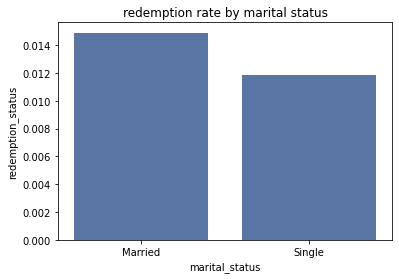

In [9]:
join_demo_df.groupby('marital_status').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='marital_status', y='redemption_status', color=colors[0])
plt.title('redemption rate by marital status')
plt.show()

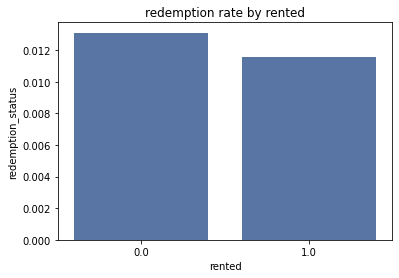

In [10]:
join_demo_df.groupby('rented').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='rented', y='redemption_status', color=colors[0])
plt.title('redemption rate by rented')
plt.show()

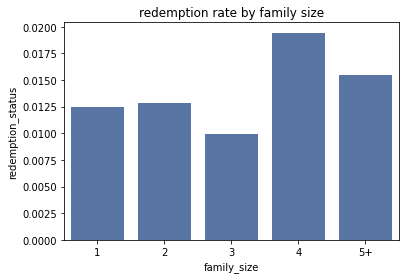

In [11]:
join_demo_df.groupby('family_size').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='family_size', y='redemption_status', color=colors[0])
plt.title('redemption rate by family size')
plt.show()

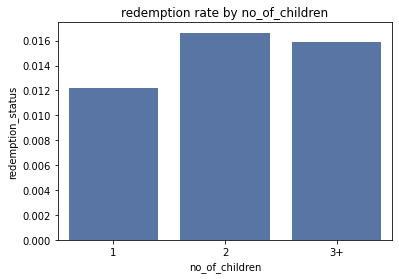

In [12]:
join_demo_df.groupby('no_of_children').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='no_of_children', y='redemption_status', color=colors[0])
plt.title('redemption rate by no_of_children')
plt.show()

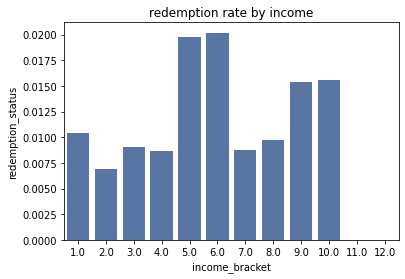

In [13]:
join_demo_df.groupby('income_bracket').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='income_bracket', y='redemption_status', color=colors[0])
plt.title('redemption rate by income')
plt.show()

### Campaign Data

In [14]:
cmpn_df['start_date'] = cmpn_df['start_date'].apply(pd.to_datetime)
cmpn_df['end_date'] = cmpn_df['end_date'].apply(pd.to_datetime)
cmpn_df['campaign_duration'] = (cmpn_df['end_date'] - cmpn_df['start_date']).astype('timedelta64[D]').astype(int)

In [15]:
cmpn_df.groupby(by=['start_date', 'campaign_id']).size()

start_date  campaign_id
2012-08-10  29             1
2012-08-25  27             1
2012-09-16  28             1
2012-11-19  30             1
2012-12-08  26             1
2012-12-12  1              1
2012-12-17  2              1
2012-12-22  3              1
2013-01-28  6              1
2013-02-02  7              1
2013-02-16  8              1
2013-04-22  11             1
            12             1
2013-05-19  13             1
2013-07-01  4              1
2013-07-09  20             1
2013-07-15  16             1
2013-07-29  17             1
2013-08-04  10             1
2013-08-10  23             1
2013-08-26  19             1
2013-09-16  21             1
            22             1
2013-10-08  18             1
2013-10-21  24             1
            25             1
2013-11-03  9              1
2013-12-01  5              1
dtype: int64

In [16]:
cmpn_df[cmpn_df['campaign_duration']<0]

,campaign_id,campaign_type,start_date,end_date,campaign_duration
6,18,X,2013-10-08,2013-04-10,-181
10,13,X,2013-05-19,2013-05-07,-12
17,6,Y,2013-01-28,2013-01-03,-25
19,5,Y,2013-12-01,2013-02-15,-289
27,26,X,2012-12-08,2012-09-21,-78


In [17]:
cmpn_df[cmpn_df['campaign_duration']>0].head()

,campaign_id,campaign_type,start_date,end_date,campaign_duration
0,24,Y,2013-10-21,2013-12-20,60
1,25,Y,2013-10-21,2013-11-22,32
2,20,Y,2013-07-09,2013-11-16,130
3,23,Y,2013-08-10,2013-11-15,97
4,21,Y,2013-09-16,2013-10-18,32


In [18]:
cmpn_df['campaign_duration'].mean()

31.392857142857142

In [19]:
print("total unique campaign ids are ", cmpn_df['campaign_id'].nunique())
print("total unique campaign types are ", cmpn_df['campaign_type'].nunique())

total unique campaign ids are  28
total unique campaign types are  2


In [20]:
cmpn_data = train_df.merge(cmpn_df, on='campaign_id', how='left')
print('campaign data: ', cmpn_df.shape[0])
print('train data: ', train_df.shape[0])
print('join data: ', cmpn_data.shape[0])

campaign data:  28
train data:  78369
join data:  78369


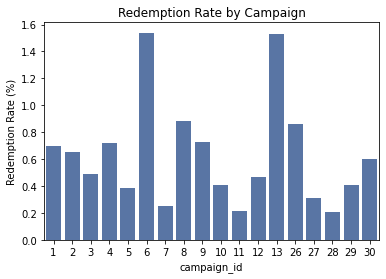

In [21]:
campaign_conversion = train_df.groupby('campaign_id').agg({'redemption_status': 'mean'}).reset_index()
campaign_conversion.rename({'redemption_status': 'redemption_rate'}, inplace=True, axis=1)
campaign_conversion['redemption_rate'] = campaign_conversion['redemption_rate']*100
sns.barplot(data=campaign_conversion, y='redemption_rate', x='campaign_id', color=colors[0])
plt.ylabel('Redemption Rate (%)')
plt.title("Redemption Rate by Campaign")
plt.show()

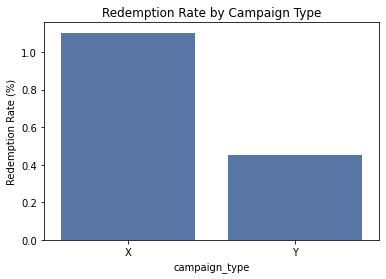

In [22]:
campaign_conversion = cmpn_data.groupby('campaign_type').agg({'redemption_status': 'mean'}).reset_index()
campaign_conversion.rename({'redemption_status': 'redemption_rate'}, inplace=True, axis=1)
campaign_conversion['redemption_rate'] = campaign_conversion['redemption_rate']*100
sns.barplot(data=campaign_conversion, y='redemption_rate', x='campaign_type', color=colors[0])
plt.ylabel('Redemption Rate (%)')
plt.title("Redemption Rate by Campaign Type")
plt.show()

<AxesSubplot:xlabel='duration_bin', ylabel='redemption_status'>

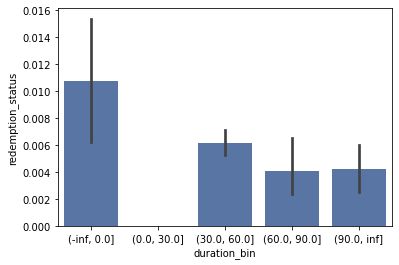

In [23]:
campaign_conversion = cmpn_data.groupby('campaign_duration').agg({'redemption_status': 'mean'}).reset_index()
campaign_conversion['duration_bin'] = pd.cut(campaign_conversion['campaign_duration'], [-np.Inf, 0, 30, 60, 90, np.Inf])
sns.barplot(data=campaign_conversion, x='duration_bin', y='redemption_status', color=colors[0])

### Coupon and Item

In [24]:
cp_it_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [25]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [26]:
print("total unique items are", item_df['item_id'].nunique())
print("total unique brands are", item_df['brand'].nunique())
print("total unique brand types are", item_df['brand_type'].nunique())
print("total unique categories are", item_df['category'].nunique())

total unique items are 74066
total unique brands are 5528
total unique brand types are 2
total unique categories are 19


In [27]:
coupon_df = cp_it_df.merge(item_df, on='item_id', how='left')
coupon_df.shape

(92663, 5)

In [28]:
coupon_df.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [29]:
agg_coupon_df = coupon_df.groupby('coupon_id').agg({'item_id': 'unique', 'category': 'unique', 'brand_type': 'unique', 'brand': 'unique'} )
agg_coupon_df['n_items'] = agg_coupon_df['item_id'].str.len()
agg_coupon_df['n_categories'] = agg_coupon_df['category'].str.len()
agg_coupon_df['n_brand_types'] = agg_coupon_df['brand_type'].str.len()
agg_coupon_df['n_brands'] = agg_coupon_df['brand'].str.len()
agg_coupon_df['brand_type'] = agg_coupon_df['brand_type'].apply(np.sort)
agg_coupon_df['brand_type'] = agg_coupon_df['brand_type'].str.join("/")
agg_coupon_df.head()

,item_id,category,brand_type,brand,n_items,n_categories,n_brand_types,n_brands
coupon_id,,,,,,,,
1,"[60068, 50199, 17091, 44112, 44868, 51028, 592...","[Natural Products, Grocery]",Established,"[4700, 1475, 1558]",39,2,1,3
2,"[2581, 12901]",[Grocery],Established,[2084],2,1,1,1
3,"[58906, 58943, 58944, 58946, 58964, 58972, 590...",[Grocery],Established,"[1558, 278]",17,1,1,2
4,"[36772, 51649, 51212, 51221, 51243, 51598, 528...",[Grocery],Established,[544],24,1,1,1
5,"[57118, 53496, 57079, 46144, 46006, 44994, 57016]",[Pharmaceutical],Established,[5357],7,1,1,1


In [30]:
join_df = train_df.merge(agg_coupon_df, on='coupon_id', how='left')

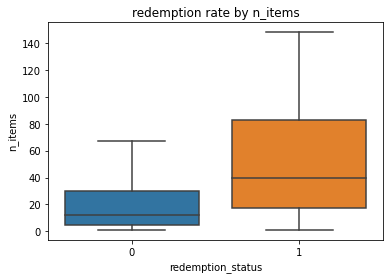

In [31]:
sns.boxplot(data=join_df, x='redemption_status', y='n_items', showfliers=False)
plt.title('redemption rate by n_items')
plt.show()

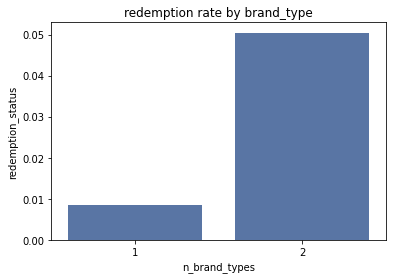

In [32]:
join_df.groupby('n_brand_types').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='n_brand_types', y='redemption_status', color=colors[0])
plt.title('redemption rate by brand_type')
plt.show()

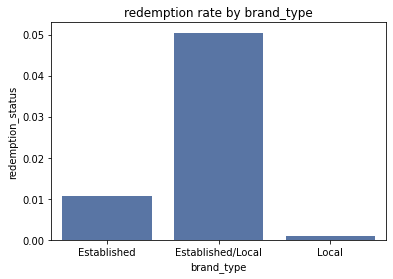

In [33]:
join_df.groupby('brand_type').agg({'redemption_status': 'mean'}).reset_index().pipe((sns.barplot, 'data'), x='brand_type', y='redemption_status', color=colors[0])
plt.title('redemption rate by brand_type')
plt.show()

### Transaction Data

In [34]:
txn_df.shape

(1324566, 7)

In [35]:
txn_df.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [36]:
# join with cmpn_df to get campaign start_date
txn_df['date'] = txn_df['date'].apply(pd.to_datetime)
join_df = train_df.merge(cmpn_df[['campaign_id', 'start_date']], on='campaign_id', how='left')
join_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,start_date
0,1,13,27,1053,0,2013-05-19
1,2,13,116,48,0,2013-05-19
2,6,9,635,205,0,2013-11-03
3,7,13,644,1050,0,2013-05-19
4,9,8,1017,1489,0,2013-02-16


In [37]:
# join txn_df with train_df and campaign data in order to identify if the transaction occurs before the campaign period 
join_txn = txn_df.merge(join_df[['customer_id', 'campaign_id', 'start_date']], on='customer_id', how='left')
join_txn = join_txn[~join_txn.duplicated()]

In [38]:
join_txn['date_diff'] = (join_txn['start_date'] - join_txn['date']).dt.days

In [39]:
join_txn.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,campaign_id,start_date,date_diff
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,13.0,2013-05-19,503.0
14,2012-01-02,1501,54253,1,53.43,-13.89,0.0,13.0,2013-05-19,503.0
28,2012-01-02,1501,31962,1,106.50,-14.25,0.0,13.0,2013-05-19,503.0
42,2012-01-02,1501,33647,1,67.32,0.00,0.0,13.0,2013-05-19,503.0
56,2012-01-02,1501,48199,1,71.24,-28.14,0.0,13.0,2013-05-19,503.0


#### Aggregate transaction (amount/number)
by number/amount of transaction, other discount, coupon discount, quantity

In [40]:
# create column to discretize the transaction data based on the time period before the start date of the campaign
join_txn['date_diff_bin'] = pd.cut(join_txn['date_diff'], bins=[0, 30, 60, 90, 120, 150, 180], 
                                   labels=['P1M','P2M','P3M','P4M','P5M','P6M'])
join_txn[join_txn['date_diff_bin'].notnull()].head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,campaign_id,start_date,date_diff,date_diff_bin
1626897,2012-02-12,1212,5191,1,42.39,0.00,0.0,29.0,2012-08-10,180.0,P6M
1626958,2012-02-12,1212,7859,1,53.43,-13.89,0.0,29.0,2012-08-10,180.0,P6M
1627019,2012-02-12,1212,8182,1,35.26,0.00,0.0,29.0,2012-08-10,180.0,P6M
1627080,2012-02-12,1212,10698,1,28.14,0.00,0.0,29.0,2012-08-10,180.0,P6M
1627141,2012-02-12,1212,13224,1,35.62,-17.45,0.0,29.0,2012-08-10,180.0,P6M


In [41]:
agg_txn = pd.pivot_table(data=join_txn, 
               values=['quantity','selling_price', 'other_discount', 'coupon_discount'], 
               index=['customer_id', 'campaign_id'],
               columns=['date_diff_bin'],
               aggfunc=np.sum
              )
agg_txn.columns = agg_txn.columns.to_series().str.join('_')
agg_txn = agg_txn.reset_index()
agg_nbr_txn = pd.pivot_table(data=join_txn, 
               values=['item_id'], 
               index=['customer_id', 'campaign_id'],
               columns=['date_diff_bin'],
               aggfunc='count'
              )
agg_nbr_txn.rename({'item_id': 'item_nbr'}, axis=1, inplace=True)
agg_nbr_txn.columns = agg_nbr_txn.columns.to_series().str.join('_')
agg_nbr_txn = agg_nbr_txn.reset_index()

In [42]:
agg_txn.head()

,customer_id,campaign_id,coupon_discount_P1M,coupon_discount_P2M,coupon_discount_P3M,coupon_discount_P4M,coupon_discount_P5M,coupon_discount_P6M,other_discount_P1M,other_discount_P2M,...,quantity_P3M,quantity_P4M,quantity_P5M,quantity_P6M,selling_price_P1M,selling_price_P2M,selling_price_P3M,selling_price_P4M,selling_price_P5M,selling_price_P6M
0,1,8.0,-204.82,-344.79,-74.80,-53.42,-318.79,0.00,-442.76,-1255.95,...,66.0,53.0,132.0,47.0,2808.97,7714.51,5356.11,4295.38,8951.28,3633.56
1,1,12.0,-138.91,-313.45,-375.79,-344.79,-62.33,-65.89,-920.41,-1864.69,...,77.0,66.0,73.0,72.0,6754.95,8450.45,5710.90,5485.45,5961.27,5919.28
2,1,13.0,0.00,-138.91,-313.45,-375.79,-344.79,-74.80,-439.19,-920.41,...,102.0,77.0,66.0,92.0,5215.08,6754.95,8450.45,5710.90,5485.45,7585.17
3,1,29.0,-14.25,-142.47,0.00,-80.13,-17.81,-35.62,-896.57,-1286.94,...,82.0,57.0,54.0,44.0,5265.68,5839.49,6525.93,5091.48,4307.51,4034.65
4,3,8.0,0.00,0.00,NaN,-1077.13,0.00,-35.62,-526.09,-964.23,...,NaN,144.0,14.0,186.0,3025.21,4878.48,NaN,8520.29,920.78,12089.67


In [43]:
agg_nbr_txn.head()

,customer_id,campaign_id,item_nbr_P1M,item_nbr_P2M,item_nbr_P3M,item_nbr_P4M,item_nbr_P5M,item_nbr_P6M
0,1,8.0,31.0,80.0,63.0,46.0,110.0,41.0
1,1,12.0,71.0,83.0,63.0,57.0,67.0,65.0
2,1,13.0,57.0,71.0,83.0,63.0,57.0,86.0
3,1,29.0,58.0,64.0,68.0,49.0,41.0,37.0
4,3,8.0,34.0,46.0,NaN,62.0,9.0,113.0


#### Aggregate transaction (brand/category)

In [44]:
join_txn = join_txn.merge(item_df, on='item_id', how='left')

In [45]:
join_txn.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,campaign_id,start_date,date_diff,date_diff_bin,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,13.0,2013-05-19,503.0,NaN,56,Local,Natural Products
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,13.0,2013-05-19,503.0,NaN,56,Local,Natural Products
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,13.0,2013-05-19,503.0,NaN,524,Established,Grocery
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,13.0,2013-05-19,503.0,NaN,1134,Established,Grocery
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,13.0,2013-05-19,503.0,NaN,524,Established,Grocery


In [46]:
agg_brand_txn = pd.pivot_table(data=join_txn, 
                         values=['quantity'], 
                         index=['customer_id', 'campaign_id'],
                         columns=['brand_type', 'date_diff_bin'],
                         aggfunc=np.sum)
agg_brand_txn.columns = agg_brand_txn.columns.to_series().str.join('_')
agg_brand_txn = agg_brand_txn.reset_index()

agg_category_txn = pd.pivot_table(data=join_txn, 
                         values=['quantity'], 
                         index=['customer_id', 'campaign_id'],
                         columns=['category', 'date_diff_bin'],
                         aggfunc=np.sum)
agg_category_txn.columns = agg_category_txn.columns.to_series().str.join('_')
agg_category_txn = agg_category_txn.reset_index()

In [47]:
agg_category_txn.head()

,customer_id,campaign_id,quantity_Alcohol_P1M,quantity_Alcohol_P2M,quantity_Alcohol_P3M,quantity_Alcohol_P4M,quantity_Alcohol_P5M,quantity_Alcohol_P6M,quantity_Bakery_P1M,quantity_Bakery_P2M,...,quantity_Travel_P3M,quantity_Travel_P4M,quantity_Travel_P5M,quantity_Travel_P6M,quantity_Vegetables (cut)_P1M,quantity_Vegetables (cut)_P2M,quantity_Vegetables (cut)_P3M,quantity_Vegetables (cut)_P4M,quantity_Vegetables (cut)_P5M,quantity_Vegetables (cut)_P6M
0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
notzero_df = (agg_category_txn>0).sum()/agg_category_txn.shape[0] * 100
notzero_df = notzero_df.reset_index()
notzero_df.columns = ['column', 'non-zero']

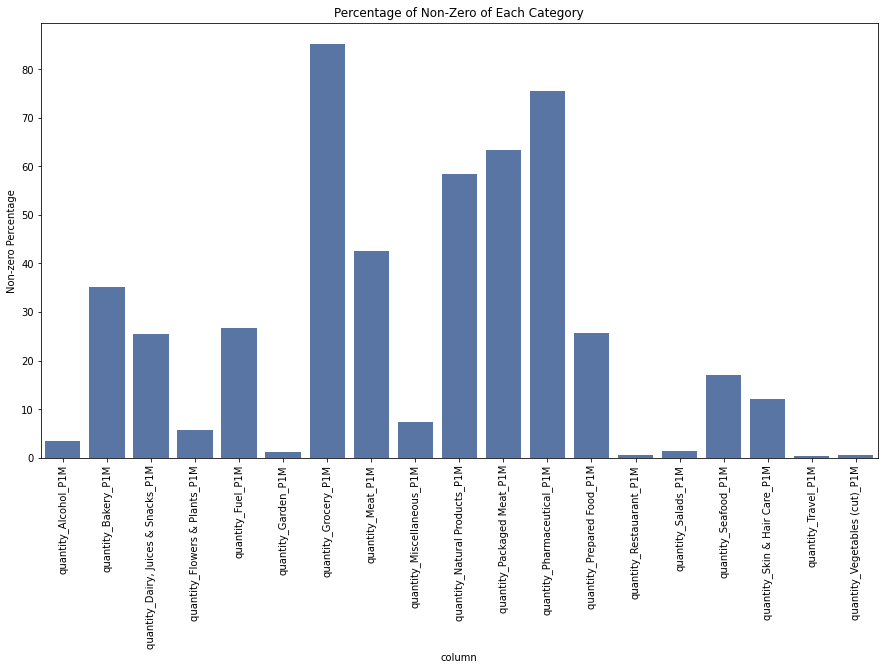

In [49]:
tmp = notzero_df[notzero_df.column.str.contains('P1M')]
plt.figure(figsize=(15,8))
sns.barplot(data=tmp, y='non-zero', x='column', color=colors[0])
plt.xticks(rotation=90)
plt.ylabel('Non-zero Percentage')
plt.title('Percentage of Non-Zero of Each Category')
plt.show()

## Spending during Campaign

In [50]:
txn_df.shape
txn_df[txn_df.duplicated(subset=['date', 'customer_id', 'item_id', 'quantity', 'selling_price', 'other_discount', 'coupon_discount'], keep=False)]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
5463,2012-01-19,801,32650,3,213.72,-159.22,0.00
5465,2012-01-19,801,32650,3,213.72,-159.22,0.00
5491,2012-01-19,814,25251,2,163.14,0.00,0.00
5493,2012-01-19,814,57670,2,21.37,0.00,0.00
5497,2012-01-19,814,25251,2,163.14,0.00,0.00
...,...,...,...,...,...,...,...
1323178,2013-07-03,1485,49741,1,142.12,-35.62,-71.24
1323390,2013-07-03,1558,64186,2,71.24,-20.66,-71.24
1323391,2013-07-03,1558,64186,2,71.24,-20.66,-71.24
1323412,2013-07-03,998,18118,2,152.45,0.00,-17.81


In [80]:
cust_cmpn_df = train_df.merge(cmpn_df[['campaign_id', 'start_date', 'end_date']], on='campaign_id', how='left')
txn_df['date'] = txn_df['date'].apply(pd.to_datetime)
txn_cmpn_df = txn_df.merge(cust_cmpn_df[['customer_id', 'campaign_id', 'start_date', 'end_date', 'redemption_status']], on='customer_id', how='left')


In [81]:
txn_cmpn_df = txn_cmpn_df.drop_duplicates()
txn_cmpn_df['date_diff'] = (txn_cmpn_df['date'] - txn_cmpn_df['start_date']).dt.days
txn_cmpn_df['in_campaign'] = np.where((txn_cmpn_df['date_diff'].between(1, 31)) | 
                                      (txn_cmpn_df['date'].between(txn_cmpn_df['start_date'], txn_cmpn_df['end_date'])), 
                                      True, False)
txn_cmpn_df.shape

(5083265, 13)

In [82]:
final_txn_df = txn_cmpn_df[(txn_cmpn_df['date_diff'] > 0)].copy()
final_txn_df[final_txn_df.duplicated(subset=['date', 'customer_id', 'item_id', 'quantity', 'selling_price', 'other_discount', 'coupon_discount'], keep=False)]
final_txn_df.sort_values(by=['in_campaign', 'date'], ascending=[False, True], inplace=True)

In [83]:
final_txn_df['date_diff_bin'] = pd.cut(final_txn_df['date_diff'], bins=[0, 30, 60, 90, 120, 150, 180], 
                                   labels=['N1M','N2M','N3M','N4M','N5M','N6M'])
final_txn_df[final_txn_df['date_diff_bin'].notnull()].head()


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,campaign_id,start_date,end_date,redemption_status,date_diff,in_campaign,date_diff_bin
25942690,2012-08-11,184,9045,1,122.89,0.00,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M
25942771,2012-08-11,184,32979,2,163.14,-49.87,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M
25942852,2012-08-11,184,36728,1,113.63,-32.06,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M
25944681,2012-08-11,911,4612,2,120.40,0.00,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M
25944768,2012-08-11,911,5576,1,58.77,0.00,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M


In [84]:
print(final_txn_df.shape)
final_txn_df.head(5)

(1056517, 14)


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,campaign_id,start_date,end_date,redemption_status,date_diff,in_campaign,date_diff_bin
25942690,2012-08-11,184,9045,1,122.89,0.00,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M
25942771,2012-08-11,184,32979,2,163.14,-49.87,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M
25942852,2012-08-11,184,36728,1,113.63,-32.06,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M
25944681,2012-08-11,911,4612,2,120.40,0.00,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M
25944768,2012-08-11,911,5576,1,58.77,0.00,0.0,29.0,2012-08-10,2012-11-30,0.0,1.0,True,N1M


In [85]:
final_txn_df.drop_duplicates(subset=['date', 'customer_id', 'item_id', 'quantity', 'selling_price', 'other_discount', 'coupon_discount'], inplace=True)
final_txn_df.shape

(438382, 14)

In [90]:
final_txn_df.groupby(['redemption_status', 'date_diff_bin']).size()

redemption_status  date_diff_bin
0.0                N1M              177380
                   N2M              104137
                   N3M               78390
                   N4M               29711
                   N5M               26813
                   N6M                9100
1.0                N1M                2369
                   N2M                 836
                   N3M                 360
                   N4M                  29
                   N5M                   7
                   N6M                  47
dtype: int64

In [87]:
agg_df = final_txn_df[final_txn_df.date_diff <= 180].groupby('in_campaign').agg({
     'customer_id': ['count', 'nunique'],
    'quantity': 'sum',
    'selling_price': 'sum',
    'other_discount': 'sum',
    'coupon_discount': 'sum'
}).reset_index()
agg_df.columns = ['in_campaign', 'txn_count', 'customer_count', 'quantity_sum', 'selling_price_sum', 'other_discount_sum', 'coupon_discount_sum']
agg_df['avg_price_per_txn'] = agg_df['selling_price_sum']/agg_df['txn_count']
agg_df['avg_price_per_customer'] = agg_df['selling_price_sum']/agg_df['customer_count']


In [88]:
agg_df.head()

,in_campaign,txn_count,customer_count,quantity_sum,selling_price_sum,other_discount_sum,coupon_discount_sum,avg_price_per_txn,avg_price_per_customer
0,False,57590,986,7387941,6.684524e+06,-1013569.31,-27163.61,116.070920,6779.436410
1,True,371589,1394,55009670,4.361996e+07,-6571579.67,-267500.96,117.387644,31291.217482


In [67]:
cust_cmpn_df = train_df.merge(cmpn_df[['campaign_id', 'start_date', 'end_date']], on='campaign_id', how='left')
txn_df['date'] = txn_df['date'].apply(pd.to_datetime)
txn_cmpn_df = txn_df.merge(cust_cmpn_df[['customer_id', 'campaign_id', 'start_date', 'end_date']], on='customer_id', how='left')

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,campaign_id,start_date,end_date,date_diff,in_campaign
25942690,2012-08-11,184,9045,1,122.89,0.00,0.0,29.0,2012-08-10,2012-11-30,1.0,True
25942771,2012-08-11,184,32979,2,163.14,-49.87,0.0,29.0,2012-08-10,2012-11-30,1.0,True
25942852,2012-08-11,184,36728,1,113.63,-32.06,0.0,29.0,2012-08-10,2012-11-30,1.0,True
25944681,2012-08-11,911,4612,2,120.40,0.00,0.0,29.0,2012-08-10,2012-11-30,1.0,True
25944768,2012-08-11,911,5576,1,58.77,0.00,0.0,29.0,2012-08-10,2012-11-30,1.0,True


In [68]:
agg_df = final_txn_df.groupby('in_campaign').agg({
     'customer_id': ['count', 'nunique'],
    'quantity': 'sum',
    'selling_price': 'sum',
    'other_discount': 'sum',
    'coupon_discount': 'sum'
}).reset_index()
agg_df.columns = ['in_campaign', 'txn_count', 'customer_count', 'quantity_sum', 'selling_price_sum', 'other_discount_sum', 'coupon_discount_sum']
agg_df['avg_price_per_txn'] = agg_df['selling_price_sum']/agg_df['txn_count']
agg_df['avg_price_per_customer'] = agg_df['selling_price_sum']/agg_df['customer_count']

In [69]:
agg_df.head()

,in_campaign,txn_count,customer_count,quantity_sum,selling_price_sum,other_discount_sum,coupon_discount_sum,avg_price_per_txn,avg_price_per_customer
0,False,66793,1022,8666675,7.766790e+06,-1180707.11,-33822.01,116.281500,7599.599022
1,True,371589,1394,55009670,4.361996e+07,-6571579.67,-267500.96,117.387644,31291.217482
